# Moving images to YUV space and computing distributions
We want to observe distribution shift in RGB to YUV space, that is, if we shift the data in RBG space, what is the corresponding shift in YUV space.


In [2]:
# Libraries
import Augment_cls as Augmentation
import conf  
# note, to import these modules we need files from github.com/dsikar/sdsandbox/src 
# Augment_cls.py	
# conf.py     
# models.py	 
# Automold.py	
# Helpers.py  
# utils.py

# Instantiate Augmentation object

In [3]:
# Instantiate object
model = 'nvidia2'
ag = Augmentation.Augment_cls(model)

# Display image

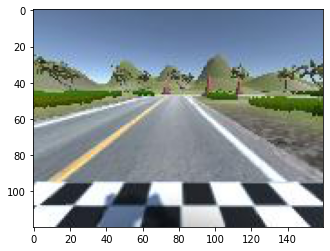

In [6]:
# Using 0_cam-image_array_.jpg

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_name = '0_cam-image_array_.jpg'
myimg = mpimg.imread(img_name)
plt.imshow(myimg)

# Plot RGB histogram

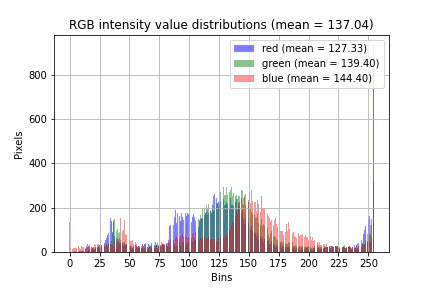

In [7]:
from utils import plot_img_hist # need utils.py
from google.colab.patches import cv2_imshow
myfig = plot_img_hist(myimg)
myplot = mpimg.imread('temp_plot.jpg')
cv2_imshow(myplot)

# Preprocess image to Udacity legacy capture size
As used in https://github.com/naokishibuya/car-behavioral-cloning

Resize image to NaokiNet original image capture size


(160, 320, 3)


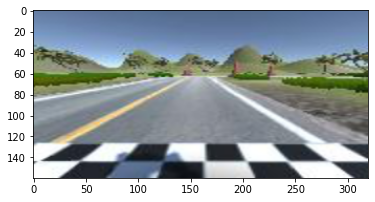

In [8]:
# change size
myimg1 = ag.resize_expected(myimg)
print(myimg1.shape)
plt.imshow(myimg1)

# Resize to Udacity legacy and crop image for nvidia2 model

(66, 200, 3)


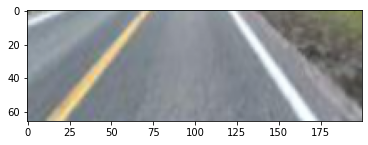

In [9]:
# change size
myimg2 = ag.resize_expected(myimg)
myimg2 = ag.crop(myimg2)
myimg2 = ag.resize(myimg2)
print(myimg2.shape)
plt.imshow(myimg2)

# Plot distribution in Udacity legacy

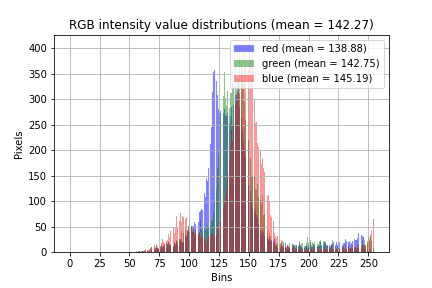

In [11]:
myfig = plot_img_hist(myimg2)
myplot = mpimg.imread('temp_plot.jpg')
cv2_imshow(myplot)

# Crop image then resize for nvidia2 model
Note here we do not resize to the original Udacity image capture size, before cropping and resizing to the expected dimensions expected by the network. This has the effect of straightening the road marks, originally in perspective, now almost in parallel.

(66, 200, 3)


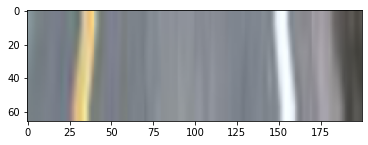

In [23]:
myimg3 = ag.crop(myimg)
myimg3 = ag.resize(myimg3)
print(myimg3.shape)
plt.imshow(myimg3)

# Plot distribution in cropped image


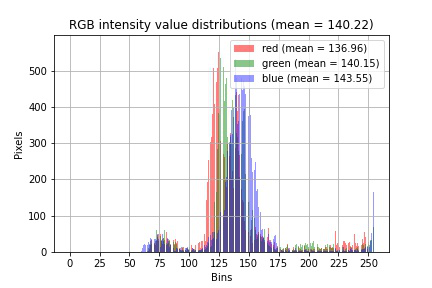

In [24]:
import cv2
myfig = plot_img_hist(myimg3)
myplot = mpimg.imread('temp_plot.jpg')
# note, because cv2_imshow uses B, G, R, we swap
# red and blue channels to get the correct order
#cv2_imshow(myplot)
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

# Move to YUV space and plot histogram


(66, 200, 3)


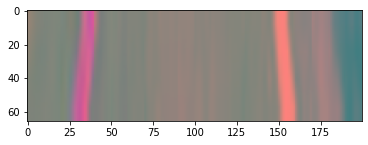

In [14]:
myimg3 = ag.crop(myimg)
myimg3 = ag.resize(myimg3)
myimg3 = ag.rgb2yuv(myimg3)
print(myimg3.shape)
plt.imshow(myimg3)

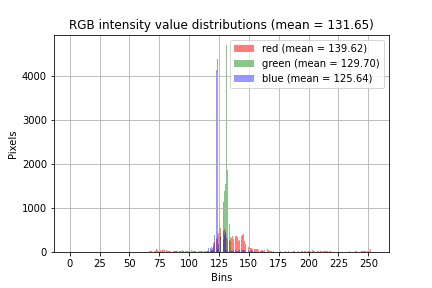

In [15]:
myfig = plot_img_hist(myimg3)
myplot = mpimg.imread('temp_plot.jpg')
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

# Compare shift on RGB and YUV images


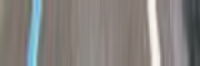

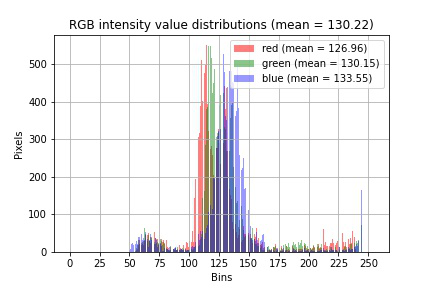

In [19]:
# shift RGB by 10 to left
myimg_shift = changeRGB(myimg, -10, -10, -10)
myimg_shift = ag.crop(myimg_shift)
myimg_shift = ag.resize(myimg_shift)
myfig = plot_img_hist(myimg_shift)
myplot = mpimg.imread('temp_plot.jpg')
# note, because cv2_imshow uses B, G, R, we swap
# red and blue channels to get the correct order
cv2_imshow(myimg_shift)
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

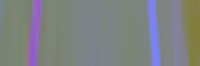

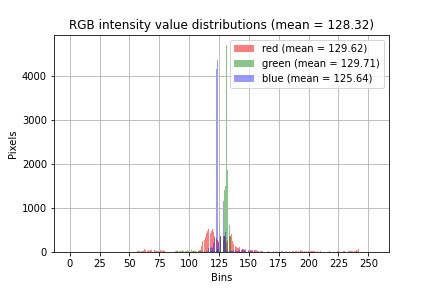

In [20]:
myimg_shift = ag.rgb2yuv(myimg_shift)
myfig = plot_img_hist(myimg_shift)
myplot = mpimg.imread('temp_plot.jpg')
# note, because cv2_imshow uses B, G, R, we swap
# red and blue channels to get the correct order
cv2_imshow(myimg_shift)
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

# Plot RGB mean shift x YUV mean shift

In [31]:
# change rgb values
# https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
def changeRGB_u_std(img, rv=0, gv=0, bv=0):
  """
  Change RGB values using PIL, and return mean and standard deviations

  Parameters
  -------
    img: uint8 numpy image array
    rv: integer, value to be added to red channel
    gv: integer, value to be added to green channel
    bv, integer, value to be added to blue channel

  Output
  -------
    myimg: uint8 numpy image array
    rgbmean: float, rgb mean
    rgbstd: float, rgb standard deviation
    rgbvar: float, rgb variance

  Example
  -------
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  img = mpimg.imread('steph.jpeg')
  myimg, rgbmean, rgbstd, rgbvar = changeRGB(img, 60, 0, 0)
  plt.imshow(myimg)
  """
  from PIL import Image
  import numpy as np

  im = Image.fromarray(np.uint8(img))

  # Split into 3 channels
  r, g, b = im.split()

  # Red
  r = r.point(lambda i: i + rv)

  # Green
  g = g.point(lambda i: i + gv)

  # Blue
  b = b.point(lambda i: i + bv)

  # Recombine back to RGB image
  result = Image.merge('RGB', (r, g, b))

  rgbmean = np.mean(result) 
  rgbstd = np.std(result) 
  rgbvar = np.var(result) 
  # Convert to uint8 numpy array
  myimg = np.asarray(result)

  return myimg, rgbmean, rgbstd, rgbvar

(66, 200, 3)


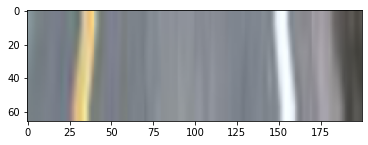

In [32]:
myimg3 = ag.crop(myimg)
myimg3 = ag.resize(myimg3)
print(myimg3.shape)
plt.imshow(myimg3)

(66, 200, 3)


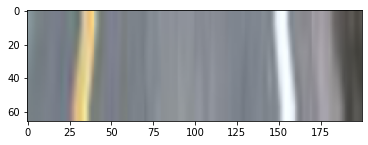

In [50]:
myimg_shift, rgbmean, rgbstd, rgbvar = changeRGB_u_std(myimg3, 0, 0, 0)
print(myimg_shift.shape)
plt.imshow(myimg_shift)

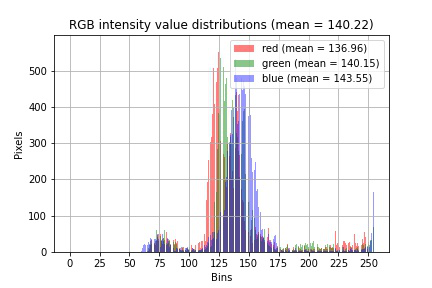

In [51]:
myfig = plot_img_hist(myimg_shift)
myplot = mpimg.imread('temp_plot.jpg')
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

In [53]:
print("rgbmean: {}, rgbstd: {}, rgbvar: {}".format(rgbmean, rgbstd, rgbvar))

rgbmean: 140.21810606060606, rgbstd: 30.804802204157, rgbvar: 948.935838837236


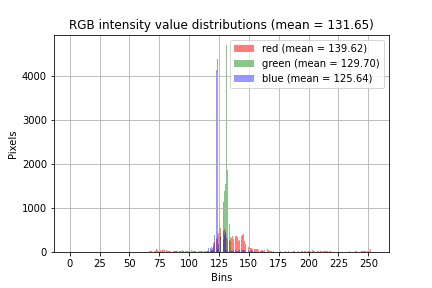

In [54]:
myimg_yuv = ag.rgb2yuv(myimg_shift)
#myimg_yuv_shift, yuvmean, yuvstd, yuvvar = changeRGB_u_std(myimg_yuv, i, i, i)
myfig = plot_img_hist(myimg_yuv)
myplot = mpimg.imread('temp_plot.jpg')
b,g,r = cv2.split(myplot)
myplot = cv2.merge([r,g,b])
cv2_imshow(myplot)

In [59]:
# starting at 
# rgbmean: 140.21810606060606, rgbstd: 30.804802204157, rgbvar: 948.935838837236
# we go to both ends
# computing mean and std for RGB and YUV space
i = 0
shift_res = []
# init
myimg_shift, rgbmean, rgbstd, rgbvar = changeRGB_u_std(myimg3, i, i, i) 
myimg_yuv = ag.rgb2yuv(myimg_shift)
myimg_yuv_shift, yuvmean, yuvstd, yuvvar = changeRGB_u_std(myimg_yuv, i, i, i)
shift_res.append([i,rgbmean, rgbstd, yuvmean, yuvstd])
i = -1
while (i > -130):
  # shift and get stats
  myimg_shift, rgbmean, rgbstd, rgbvar = changeRGB_u_std(myimg3, i, i, i) 
  # convert shifted image to YUV
  myimg_yuv = ag.rgb2yuv(myimg_shift)
  # get the stats for the shifted YUV - not not shift again
  myimg_yuv_stats, yuvmean, yuvstd, yuvvar = changeRGB_u_std(myimg_yuv, 0, 0, 0)
  shift_res.append([i,rgbmean, rgbstd, yuvmean, yuvstd])
  i = i - 1

# now increase
i = 1
# shift_res = []
while (i < 100):
  # shift and get stats
  myimg_shift, rgbmean, rgbstd, rgbvar = changeRGB_u_std(myimg3, i, i, i) 
  # convert shifted image to YUV
  myimg_yuv = ag.rgb2yuv(myimg_shift)
  # get the stats for the shifted YUV - not not shift again
  myimg_yuv_stats, yuvmean, yuvstd, yuvvar = changeRGB_u_std(myimg_yuv, 0, 0, 0)
  shift_res.append([i,rgbmean, rgbstd, yuvmean, yuvstd])
  i = i + 1

In [60]:
for i in range (0, len(shift_res)):
  print(shift_res[i])

[0, 140.21810606060606, 30.804802204157, 131.65489898989898, 19.153261352687235]
[-1, 139.21810606060606, 30.804802204157, 131.32156565656567, 19.01999425307756]
[-2, 138.21810606060606, 30.804802204157, 130.98823232323232, 18.897549755836305]
[-3, 137.21810606060606, 30.804802204157, 130.65489898989898, 18.786139481169585]
[-4, 136.21810606060606, 30.804802204157, 130.32156565656567, 18.68596079633191]
[-5, 135.21810606060606, 30.804802204157, 129.98823232323232, 18.597195207949817]
[-6, 134.21810606060606, 30.804802204157, 129.65489898989898, 18.520006824177326]
[-7, 133.21810606060606, 30.804802204157, 129.32156565656567, 18.45454091482642]
[-8, 132.21810606060606, 30.804802204157, 128.98823232323232, 18.40092259727415]
[-9, 131.21810606060606, 30.804802204157, 128.65489898989898, 18.359255674705086]
[-10, 130.21810606060606, 30.804802204157, 128.32156565656567, 18.32962165108576]
[-11, 129.21810606060606, 30.804802204157, 127.98823232323232, 18.31207894421486]
[-12, 128.21810606060

# Pickle results

In [61]:
# from https://wiki.python.org/moin/UsingPickle
import pickle
pickle.dump( shift_res, open( "shift_res.pickle", "wb" ) )

In [ ]:
import pickle
shift_res = pickle.load( open( "shift_res.pickle", "rb" ) )
for i in range (0, len(shift_res)):
  print(shift_res[i])

# Plot 

In [8]:
import numpy as np
resarr =  np.array(shift_res)
idx = resarr[:,0]
rgbmean = resarr[:,1]
rgbstd = resarr[:,2]
yuvmean = resarr[:,3]
yuvstd = resarr[:,4]

resarr[:,0],


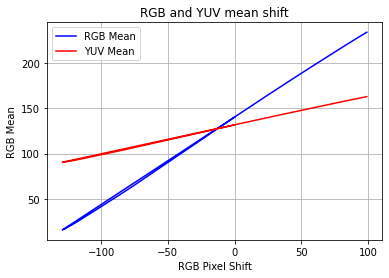

In [27]:
import matplotlib.pyplot as plt
plt.title("RGB and YUV mean shift")
plt.xlabel("RGB Pixel Shift")
#plt.xticks(np.arange(0, 255, step=25))
plt.ylabel("RGB Mean")
plt.plot(idx,rgbmean, "-b", label="RGB Mean")
#plt.plot(idx,rgbstd)
plt.plot(idx,yuvmean, "-r", label="YUV Mean")
plt.legend(loc='upper left')
plt.grid()
#plt.plot(idx,yuvstd)